In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [12]:
data = pd.read_csv('diabetes_cleaned.csv')
Features = np.array(pd.read_csv('Features.csv'))
Labels = np.array(pd.read_csv('Labels.csv'))
print(Features.shape)
print(Labels.shape)

(71517, 177)
(71517, 1)


In [13]:
# check for Class imbalance (Are there unequal numbers of cases for the categories of the label?)
print(data['label'].value_counts())

0    65225
1     6293
Name: label, dtype: int64


In [14]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 10000)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [15]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.34270268]
[[  8.24068513e-03  -1.16410417e-01  -1.69633897e-02  -4.73279812e-02
   -1.70241579e-01  -1.37384295e-01  -1.10409109e-01  -9.49092784e-02
   -1.82181953e-01  -4.67968404e-01  -3.33342716e+00   7.01495097e-01
   -1.48506691e+00  -5.51698971e-01   1.93151631e+00  -1.41601793e-01
   -4.41152974e-01   3.44529526e-01  -2.34369461e-01   4.91965136e-01
   -1.53706130e-01   1.30981528e+00  -9.95133982e-01  -8.26608301e-01
   -5.04979261e-01  -1.42768354e-01   1.82191085e+00   4.35875634e-01
    2.45385119e-01   1.01502774e+00   2.33291910e-02   1.37362215e-01
   -1.28192761e-02   6.72568142e-01   1.14572577e-01  -3.98154174e-01
   -4.88493743e-02  -6.51631245e-02  -1.29282094e-01  -1.76487218e-01
    2.98463152e-02   4.86264032e-01  -2.40976582e-01  -1.13527903e-01
    6.33632289e-01  -9.15709773e-02  -4.25830594e-01   5.62129834e-02
    3.24435934e-03  -3.16698924e-02   5.50366960e-02   2.34365350e-03
   -7.20480570e-02  -2.31591234e-01  -4.14070448e-02  -8.34674112e-02
   -1.

In [17]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[ 0.93871894  0.06128106]
 [ 0.96149997  0.03850003]
 [ 0.84017622  0.15982378]
 [ 0.86597969  0.13402031]
 [ 0.90255684  0.09744316]
 [ 0.91495964  0.08504036]
 [ 0.7866975   0.2133025 ]
 [ 0.93695811  0.06304189]
 [ 0.90953923  0.09046077]
 [ 0.92338664  0.07661336]
 [ 0.93641463  0.06358537]
 [ 0.93645432  0.06354568]
 [ 0.9130216   0.0869784 ]
 [ 0.9364698   0.0635302 ]
 [ 0.9144626   0.0855374 ]]


In [18]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [19]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive      9098                 9
Actual negative       883                10

Accuracy  0.91
 
           Positive      Negative
Num case     9107           893
Precision    0.91          0.53
Recall       1.00          0.01
F1           0.95          0.02


In [20]:
#### 
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
Actual positive      9095                12
Actual negative       882                11

Accuracy  0.91
 
           Positive      Negative
Num case     9107           893
Precision    0.91          0.48
Recall       1.00          0.01
F1           0.95          0.02

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
Actual positive      9087                20
Actual negative       881                12

Accuracy  0.91
 
           Positive      Negative
Num case     9107           893
Precision    0.91          0.38
Recall       1.00          0.01
F1           0.95          0.03

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
Actual positive      9075                32
Actual negative       874                19

Accuracy  0.91
 
           Positive      Negative
Num cas

In [ ]:
## Compute a weighted model¶


In [25]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

In [21]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [22]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[ 0.92658371  0.07341629]
 [ 0.95331723  0.04668277]
 [ 0.81131154  0.18868846]
 [ 0.84056428  0.15943572]
 [ 0.8829865   0.1170135 ]
 [ 0.89822707  0.10177293]
 [ 0.75261034  0.24738966]
 [ 0.92395834  0.07604166]
 [ 0.89175468  0.10824532]
 [ 0.90809915  0.09190085]
 [ 0.9235772   0.0764228 ]
 [ 0.92336483  0.07663517]
 [ 0.89530018  0.10469982]
 [ 0.92357134  0.07642866]
 [ 0.89773495  0.10226505]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive      9094                13
Actual negative       882                11

Accuracy  0.91
 
           Positive      Negative
Num case     9107           893
Precision    0.91          0.46
Recall       1.00          0.01
F1           0.95          0.02


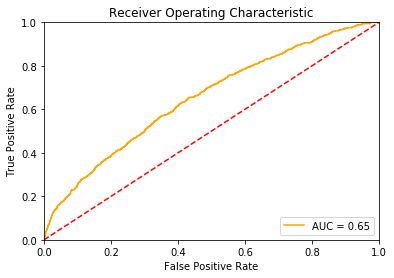

In [26]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities) 

In [28]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
Actual positive      9087                20
Actual negative       881                12

Accuracy  0.91
 
           Positive      Negative
Num case     9107           893
Precision    0.91          0.38
Recall       1.00          0.01
F1           0.95          0.03

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
Actual positive      9078                29
Actual negative       875                18

Accuracy  0.91
 
           Positive      Negative
Num case     9107           893
Precision    0.91          0.38
Recall       1.00          0.02
F1           0.95          0.04

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
Actual positive      9046                61
Actual negative       857                36

Accuracy  0.91
 
           Positive      Negative
Num cas